## CSE 532 Assignment 4 (Due 4/27/24)

**Note: As with the previous assignment you should submit a separate document (.pdf or .doc(x)) with your responses to the analysis portion of the problems.** 

**1. (Machine Learning (Classification))** <br>a. Choose one of the [toy classification datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html) bundled with sklearn **other than the digits dataset**. <br> b. Train **three** distinct sklearn classification estimators for the chosen dataset and compare the results to see which one performs the best when using **2-fold cross-validation**.  Note that you should use three distinct classification models here (not just tweak underlying parameters).  A relatively complete listing of the available estimators can be found here (https://scikit-learn.org/stable/supervised_learning.html) -- but make sure you only use classifiers!  Unless you have an inclination to do otherwise, I recommend using the model default parameters when available.   <br> c. Repeat a. for **20-fold cross-validation**. Explain in a paragraph the difference in your results when using 20-fold vs 2-fold cross-validation (if any). <br>d. Construct a **confusion matrix** for your _most accurate_ model between the three estimators and two cross-fold options. <br> e. Which class in your dataset is most accurately predicted to have the correct label by the best classifier, and and which is most likely to be confused among one or more of the wrong classes?_(You can use a cell in a jupyter notebook file for this or a separate text/document file)._


In [41]:
from sklearn.datasets import load_iris

iris = load_iris() # part a

# part b train 3 different classifiers and compare when using 2-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

tsne = TSNE(n_components=2, random_state=11)
reduced_data = tsne.fit_transform(iris.data)

# Train 3 distinct classification estimators
log_reg = LogisticRegression()
svc = SVC()
knn = KNeighborsClassifier()

estimators = {
    'Logistic Regression': log_reg,
    'SVC': svc,
    'K-Nearest Neighbors': knn
}

# Perform 2-fold cross validation
print("2-fold cross validation: ")
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=2, random_state=11, shuffle=True)
    scores = cross_val_score(estimator_object, reduced_data, iris.target, cv=kfold)
    print(f'{estimator_name:>20}: ' +
          f'mean accuracy={scores.mean():.2%}, ' +
          f'standard deviation={scores.std():.2%}')

# Repeat with 20-fold cross validation
print("\n20-fold cross validation: ")
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=20, random_state=11, shuffle=True)
    scores = cross_val_score(estimator_object, reduced_data, iris.target, cv=kfold)
    print(f'{estimator_name:>20}: ' +
          f'mean accuracy={scores.mean():.2%}, ' +
          f'standard deviation={scores.std():.2%}')

# Construct confusion matrix for 2 fold k nearest as it has highest score
kfold = KFold(n_splits=2, random_state=11, shuffle=True)
predicted = cross_val_predict(knn, reduced_data, iris.target, cv=kfold)
conf_matrix = confusion_matrix(iris.target, predicted)
print("\nConfusion Matrix: ")
print(conf_matrix)


2-fold cross validation: 
 Logistic Regression: mean accuracy=96.00%, standard deviation=1.33%
                 SVC: mean accuracy=96.67%, standard deviation=2.00%
 K-Nearest Neighbors: mean accuracy=98.00%, standard deviation=0.67%

20-fold cross validation: 
 Logistic Regression: mean accuracy=96.61%, standard deviation=5.89%
                 SVC: mean accuracy=96.07%, standard deviation=7.20%
 K-Nearest Neighbors: mean accuracy=97.32%, standard deviation=5.37%

Confusion Matrix: 
[[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]


Analysis:

c) The accuracy is not much different between the 20 fold and 2 fold cross valdation but the standard deviation is higher by around 5 percent for each one. Logistic regression's mean accuracy increases by .6% in the 20 fold validation while SVC drops .6% in the 20 fold compared to 2 fold. KNN drops .67 in the 20 fold compared to 2 fold. This shows that with these models the folds chosen may be important and having more folds may be a better way to compare them.

e) Class 1 is most accurate with 50 correct and 0 false negatives while class 2 is most confused with 2 false negatives


**2 (Option II). (PRAW and Sentiment)** <br>*Note: you should feel free to propose an alternative task using PRAW of your own design to me via email if you have a specific one in mind.*
<br>a. Use PRAW to extract the 20 top submissions of all time from each of five related subreddits of your choice (ex: someone interested in sports subreddits might extract the top 20 posts from r/basketball, top 20 posts from r/football, etc.). 
<br>b. Use a sentiment analyzer (via Textblob or one of your choosing) to determine the positive sentiment of each and every top submission (all 100 in total), and store these in a variable of your choosing (data-frame, list of lists, etc.)  
c. Investigate how to use a Python [box-plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html).  After doing so, produce a box-plot (default parameters are fine) for the sentiment measures of each of your five subreddits.  Your presentation should look _something_ like the image at the bottom of this file, with your five chosen subreddits replacing the x-axis labels (Subreddit 1 .. Subreddit 5).
<br>d. Repeat steps a-c but use the 20 most controversial submissions of all time for each of your five subreddits.<br>e. Does anything surprise you about the distribution of sentiments, either with respect to individual subreddits, differences between the five subreddits, or the differences between _top_ and _controversial_ submissions?  Explain your answer in a few sentences.  _(You can use a cell in a jupyter notebook file for this or a separate text/document file)._
<br>


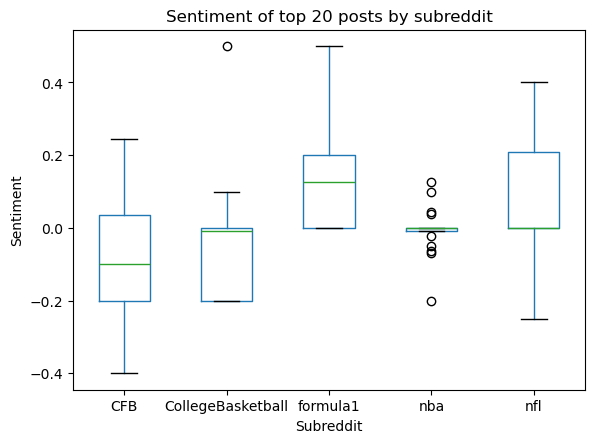

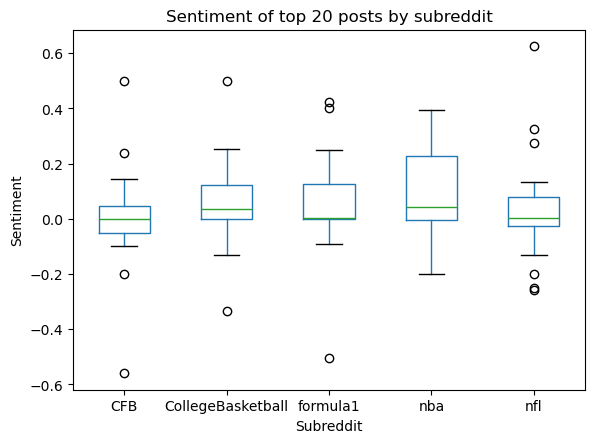

In [72]:
import praw
import pandas as pd
from textblob import TextBlob
rs_readonly = praw.Reddit(client_id="id",\
                          client_secret="secret",\
                          user_agent="MSW:CSE532Assign4:v0.1.0")

cfb = rs_readonly.subreddit("CFB")
cbb = rs_readonly.subreddit("CollegeBasketball")
nba = rs_readonly.subreddit("NBA")
nfl = rs_readonly.subreddit("NFL")
f1 = rs_readonly.subreddit("Formula1")

subreddits = [cfb, cbb, nba, nfl, f1]

def get_sentiment(posts):
    # Analyze  sentiment of top 20 posts
    sentiments = []
    for post in posts:
        titleblob = TextBlob(post[0])
        bodyblob = TextBlob(post[2])
        sentiments.append([post[0], post[1], (titleblob.sentiment.polarity + bodyblob.sentiment.polarity) / 2])

    # Create a box plot of sentiment measures
    import matplotlib.pyplot as plt
    sentiments_df = pd.DataFrame(sentiments, columns=['title', 'Subreddit', 'polarity'])
    # print(sentiments_df)
    sentiments_df.boxplot(by='Subreddit', column='polarity', grid=False)
    plt.suptitle('')
    plt.title('Sentiment of top 20 posts by subreddit')
    plt.ylabel('Sentiment')
    plt.show()

# Get top 20 posts of all time
top_posts = []
for subreddit in subreddits:
    for post in subreddit.top(limit=20):
        top_posts.append([post.title, str(post.subreddit), post.selftext])

get_sentiment(top_posts)

# Get 20 most controversial posts of all time
controversial_posts = []
for subreddit in subreddits:
    for post in subreddit.controversial(limit=20):
        controversial_posts.append([post.title, str(post.subreddit), post.selftext])

get_sentiment(controversial_posts)





Analysis:

e) I don't use most of these subreddits but with CFB I am not suprised the top posts are negative as they are about teams that are commonly diskliked, such as Alabama being defeated. I would assume CollegeBasketball is similar while the other 3 are more positive. F1 and nfl are pretty similar though nfl has some negative posts. I was initially suprised by r/NBA being basically neutral but once I looked at the posts they are all the news or posts about players which would explain the neutral sentiment. I was also surpised by the controversial posts being generally neutral or slightly positive but after investigating they are mostly just unpopular ideas instead of negative ones.